<a href="https://colab.research.google.com/github/NavaLeib/Cells_Barcoding/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [467]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [468]:
import sys

sys.path.insert(0,'/content/drive/MyDrive/ColabNotebooks/Barcoding')


In [469]:
!ls '/content/drive/MyDrive/ColabNotebooks/Barcoding'

functions.py  _init_.py  main.ipynb


In [470]:
from functions import *

In [471]:
 pip install networkx

In [488]:
cells = 50
barcodes = 50
system=LargeSystem(barcodes=barcodes,cells=cells)


24


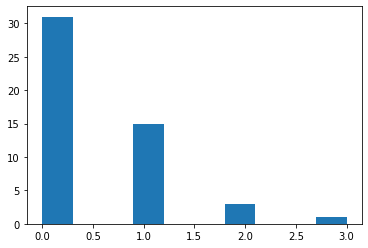

In [489]:
system=system.generate_barcoded_cells(p=0.01,Poisson=True)
plt.hist(system.sum(axis=1))
print(system[system.sum(axis=1)>0].sum())

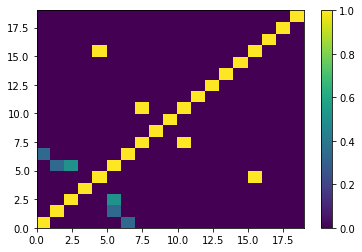

In [490]:
A=LargeSystem.SimilarityMatrix(system[system.sum(axis=1)>0])
plt.pcolormesh(A)
plt.colorbar()
#plt.xticks(np.arange(0.5,len([x for x in system if x]), 1),[x for x in system if x])
#plt.yticks(np.arange(0.5,len([x for x in system if x]), 1),[x for x in system if x])


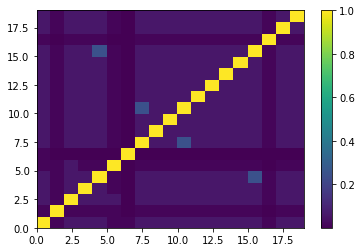

In [493]:
dropout_prob=0.5
AA=LargeSystem.DistanceMatrix_dropout(system[system.sum(axis=1)>0],dropout_prob=dropout_prob)
plt.pcolormesh(AA)
plt.colorbar()

(19, 50)


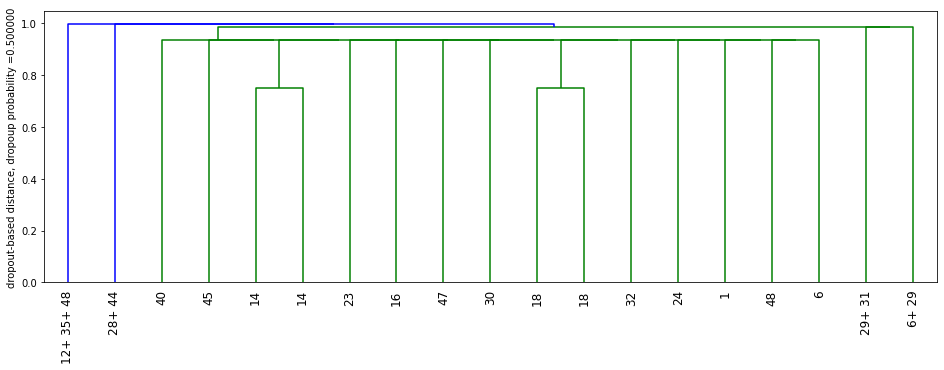

In [496]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform

import matplotlib.pyplot as plt

X_infect=system[system.sum(axis=1)>0]

print(X_infect.shape)

labels = ["" for x in range(X_infect.shape[0])]
for k in range(X_infect.shape[0]):
    labels[k]=''.join("+ ").join([str(l) for l in np.flatnonzero(X_infect[k,:])])


plt.figure(figsize=(16,5))
dists = squareform(1-AA)
linkage_matrix = linkage(dists, "complete")
R=dendrogram(linkage_matrix,color_threshold=0.99,labels=labels,leaf_rotation=90)
plt.ylabel("dropout-based distance, dropoup probability =%f" %dropout_prob)
plt.show()

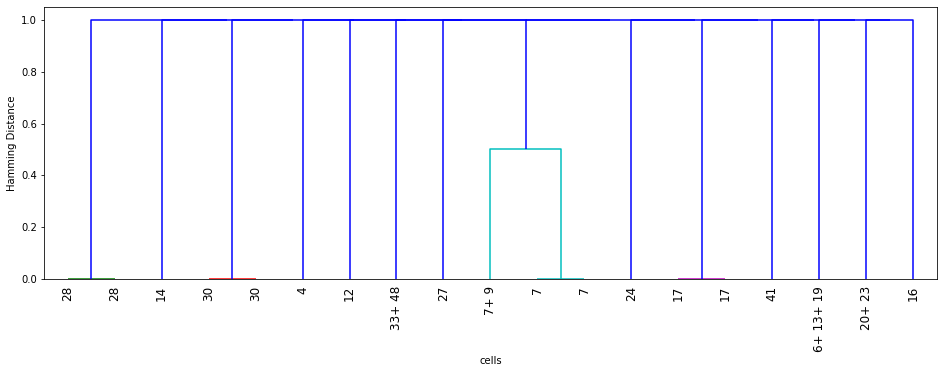

In [479]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform

import matplotlib.pyplot as plt

X_infect=system[system.sum(axis=1)>0]

labels = ["" for x in range(X_infect.shape[0])]
for k in range(X_infect.shape[0]):
    labels[k]=''.join("+ ").join([str(l) for l in np.flatnonzero(X_infect[k,:])])


plt.figure(figsize=(16,5))
dists = squareform(1-A)
linkage_matrix = linkage(dists, "complete")
R=dendrogram(linkage_matrix,color_threshold=0.9,labels=labels,leaf_rotation=90)
plt.ylabel("Hamming Distance")
plt.xlabel("cells")
plt.show()

In [480]:
X=system[system.sum(axis=1)>0]
i=0
j=11
dropout_prob=0.2
Union_len=len(set([l for l in np.flatnonzero(X[i,:])]) | set([l for l in np.flatnonzero(X[j,:])]))
Pij_sim_len = len((set([l for l in np.flatnonzero(X[i,:])]) | set([l for l in np.flatnonzero(X[j,:])])) & set([l for l in np.flatnonzero(X[i,:])]))
Pji_sim_len = len((set([l for l in np.flatnonzero(X[i,:])]) | set([l for l in np.flatnonzero(X[j,:])])) & set([l for l in np.flatnonzero(X[j,:])]))
(1-dropout_prob)**Pij_sim_len*dropout_prob**(Union_len-Pij_sim_len)+(1-dropout_prob)**Pji_sim_len*dropout_prob**(Union_len-Pji_sim_len)
print(set([l for l in np.flatnonzero(X[i,:])]) , set([l for l in np.flatnonzero(X[j,:])]))
print('Union',(set([l for l in np.flatnonzero(X[i,:])]) | set([l for l in np.flatnonzero(X[j,:])])), Union_len )
print('overlap with Union',(set([l for l in np.flatnonzero(X[i,:])]) | set([l for l in np.flatnonzero(X[j,:])])) & set([l for l in np.flatnonzero(X[i,:])]),Pij_sim_len)
print(1-(1-dropout_prob)**Pij_sim_len*dropout_prob**(Union_len-Pij_sim_len)*(1-dropout_prob)**Pji_sim_len*dropout_prob**(Union_len-Pji_sim_len)
)

{17} {27}
Union {17, 27} 2
overlap with Union {17} 1
0.9744


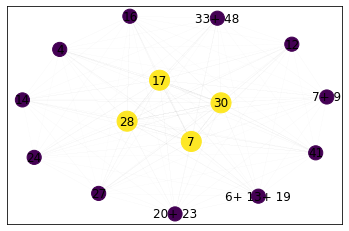

In [487]:
NetworkPlot(A=AA,labels=labels,edge_width=0.01,node_size=10)

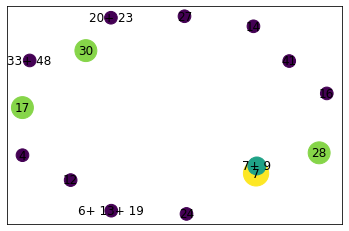

In [483]:
NetworkPlot(A=A,labels=labels,edge_width=0.1,node_size=80)